# Assignment 1

## In Brightspace, you will find a collection of texts. Use NLTK for the following analyses. 

Part 1.

1. Perform sentence splitting and word tokenization. Report the statistics of word frequency (per story and in total) in a python dictionary, plot the 25 most common words (per story and in total) in the form of a histogram. 

2. Perform stemming on the text using the Porter and Lancaster stemmer. Re-create the statistics and the plot from 1. Compare the differences between the stemmed and unstemmed results, and discuss the difference in the results of the two stemmers.

3. In Brightspace, you will find three translations of Tom Sawyer by Mark Twain. After cleaning the document (e.g. removing the preamble, TOC, licensing information ...), use the appropriate spacy models to derive the POS-tags of the text. Report the frequencies of the tags for the three languages. What assumptions do you make based on the findings

Part 2. 

On the data for Part I (1+2), perform Named Entity Recognition using spacy. Annotate a small data set of 1-2 sentences per text with named entity categories. (The sentences are supposed to include names of characters, places and other entities.)

How good or bad is the performance of the automatic method on the manually annotated text? Report Precision, Recall, F1 Score and discuss the results. 

## Results
1. Provide your discussion as a short report in brightspace.

2. Provide the code as a jupyter notebook. Make sure your code runs (after necessary libraries are installed). That includes using relative file paths to read the data. Deliver your code via GitHub add FPannach 


## Part 1.

### 1.1 Tokenizing and Plotting the 25 Most Frequent Words per Story and in Total

In [1]:
# Install all modules
!pip install matplotlib
!pip install pandas
!pip install nltk
!pip install spacy

In [2]:
# Import the working modules
import os
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import re

# Import spacy 
import spacy

# Install spaCy English language model
!spacy download en_core_web_lg
# Load the English language pipeline.
nlp_en = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gheorghe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Make a function that will open and read the contents of each file
def read_file(filename):
    with open(filename, encoding='utf8') as infile:
        contents = infile.read()
        
        text_content = contents.split('---')  # split on '---' and extract only the content of the text
        return text_content[1].strip()  # Remove leading/trailing whitespace

In order to accurately report the word frequency, we need to remove punctuation first and then tokenize each word and calculate their frequency.

In [4]:
# Function that will remove the punctuation and tokenize the texts
def tokenize_words_no_punct(sent):
    return [token.lower() for token in nltk.word_tokenize(sent)
        if token.isalpha()]

# Function that will apply the tokenization process to a text in our corpus
def preprocess(text):
    return [tokenize_words_no_punct(sent) for sent in nltk.sent_tokenize(text)]

In [5]:
# Add the file names in our directory to a new variable
filenames = glob('Part_I_1-2/*.txt')

In [6]:
# Import the Counter module from 'collections' for the counting task
from collections import Counter

# Initialize a dicitonary that will store each word and their counts in every separate text
word_freq_dict = {}

# Create a new list to store all the texts for future use
part1_texts = []

# Iterate through each file in the directory and perform the above cleaning operations
for filename in filenames:
    text = read_file(filename)   # Read text
    part1_texts.append(text)
    
    processed_text = preprocess(text)   # Tokenize text
    words_text = [word for sentence in processed_text for word in sentence]  # Aggregate the lists of sentences into one list of words
    
    # Count and store the words and their frequencies in the dictionary
    word_freq_dict[os.path.basename(filename)] = Counter(words_text)

# Compute total word frequency across all files
total_word_freq = Counter()
for word_freq in word_freq_dict.values():
    total_word_freq.update(word_freq)

Before proceeding with the analysis, let's store the current texts into a DataFrame which we will use later to perform Named-Entity-Recognition (NER) with spaCy.

In [7]:
# Create dictionary object associating each file name with its text for future use
part1_d = {'Filename':filenames, 'Raw_Text':part1_texts}

In [8]:
# Turn dictionary into a dataframe for future use
part1_df = pd.DataFrame(part1_d)

In [9]:
part1_df.head()

,Filename,Raw_Text
0,Part_I_1-2\01.txt,"Missy was sitting on a chair in a house, maps ..."
1,Part_I_1-2\02.txt,How can you look me in the eyes and tell me yo...
2,Part_I_1-2\03.txt,"""I want you safe. My Doctor.""\n\nEven as the r..."
3,Part_I_1-2\04.txt,Then\n\n \n\n \n\nShe had a smile that lit up ...
4,Part_I_1-2\05.txt,"If the Doctor was there, you’d tell her she is..."


In [10]:
# Further remove unwanted characters using re
def clean_text(text):
    # substitute new line \n with whitespace and return the cleaned text
    return re.sub(r'[\n]+', ' ', text).strip()

In [11]:
# Apply the clean_text function from before to the Dataframe column containing our texts
part1_df['Cleaned_Text'] = part1_df['Raw_Text'].apply(clean_text)

In [12]:
# Define a function that runs the nlp pipeline on any given input text
def process_text(text):
    return nlp_en(text)

In [13]:
# Apply the function to the Cleaned_Text column 
part1_df["Doc"] = part1_df['Cleaned_Text'].apply(process_text)

In [14]:
# Preserve this DataFrame for doing Named-Entity-Recognition in part 3 of this assignment
part1_df.head()

,Filename,Raw_Text,Cleaned_Text,Doc
0,Part_I_1-2\01.txt,"Missy was sitting on a chair in a house, maps ...","Missy was sitting on a chair in a house, maps ...","(Missy, was, sitting, on, a, chair, in, a, hou..."
1,Part_I_1-2\02.txt,How can you look me in the eyes and tell me yo...,How can you look me in the eyes and tell me yo...,"(How, can, you, look, me, in, the, eyes, and, ..."
2,Part_I_1-2\03.txt,"""I want you safe. My Doctor.""\n\nEven as the r...","""I want you safe. My Doctor."" Even as the rege...","("", I, want, you, safe, ., My, Doctor, ., "", E..."
3,Part_I_1-2\04.txt,Then\n\n \n\n \n\nShe had a smile that lit up ...,Then She had a smile that lit up his life....,"(Then, , She, had, a, smile, that, lit, up..."
4,Part_I_1-2\05.txt,"If the Doctor was there, you’d tell her she is...","If the Doctor was there, you’d tell her she is...","(If, the, Doctor, was, there, ,, you, ’d, tell..."


Now that we have our texts safely stored in this DataFrame let's come back to our analysis.

In [15]:
# Display the word frequencies for each separate text
word_freq_dict

{'01.txt': Counter({'the': 17,
          'her': 12,
          'river': 11,
          'missy': 10,
          'a': 10,
          'and': 9,
          'to': 8,
          'was': 7,
          'on': 7,
          'it': 6,
          'maps': 5,
          'she': 5,
          'at': 5,
          'that': 4,
          'over': 4,
          's': 4,
          'sitting': 3,
          'chair': 3,
          'had': 3,
          'placing': 3,
          'in': 2,
          'house': 2,
          'map': 2,
          'out': 2,
          'of': 2,
          'people': 2,
          'own': 2,
          'this': 2,
          'looked': 2,
          'smiled': 2,
          'still': 2,
          'place': 2,
          'smiles': 2,
          'leans': 2,
          'kiss': 2,
          'smile': 2,
          'table': 2,
          'cup': 2,
          'coffee': 2,
          'or': 2,
          'little': 2,
          'turned': 2,
          'papers': 1,
          'spread': 1,
          'around': 1,
          'normally': 1,
          

In [16]:
word_freq_dict

{'01.txt': Counter({'the': 17,
          'her': 12,
          'river': 11,
          'missy': 10,
          'a': 10,
          'and': 9,
          'to': 8,
          'was': 7,
          'on': 7,
          'it': 6,
          'maps': 5,
          'she': 5,
          'at': 5,
          'that': 4,
          'over': 4,
          's': 4,
          'sitting': 3,
          'chair': 3,
          'had': 3,
          'placing': 3,
          'in': 2,
          'house': 2,
          'map': 2,
          'out': 2,
          'of': 2,
          'people': 2,
          'own': 2,
          'this': 2,
          'looked': 2,
          'smiled': 2,
          'still': 2,
          'place': 2,
          'smiles': 2,
          'leans': 2,
          'kiss': 2,
          'smile': 2,
          'table': 2,
          'cup': 2,
          'coffee': 2,
          'or': 2,
          'little': 2,
          'turned': 2,
          'papers': 1,
          'spread': 1,
          'around': 1,
          'normally': 1,
          

In [17]:
# Display the word frequencies for each separate text
total_word_freq

Counter({'the': 327,
         'you': 305,
         'to': 238,
         'she': 214,
         'her': 191,
         'and': 175,
         'he': 141,
         'a': 140,
         'your': 122,
         'was': 115,
         'of': 108,
         'it': 104,
         'that': 88,
         'in': 87,
         't': 82,
         'doctor': 82,
         'i': 80,
         'his': 59,
         'with': 58,
         'but': 55,
         'for': 55,
         'him': 49,
         'had': 47,
         'on': 46,
         'at': 46,
         'rose': 46,
         'as': 42,
         'so': 41,
         's': 40,
         'not': 39,
         'out': 35,
         'be': 34,
         'time': 32,
         'when': 31,
         'could': 29,
         'up': 29,
         'were': 28,
         'how': 28,
         'this': 27,
         'have': 27,
         'back': 27,
         'what': 27,
         'from': 26,
         'didn': 25,
         'like': 25,
         'an': 24,
         'do': 24,
         'just': 24,
         'eyes': 23,
        

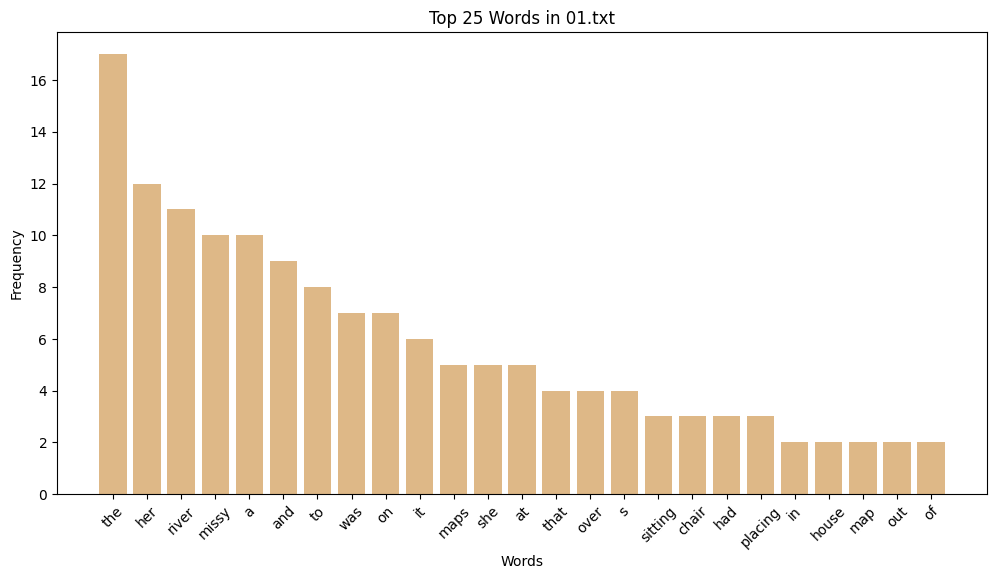

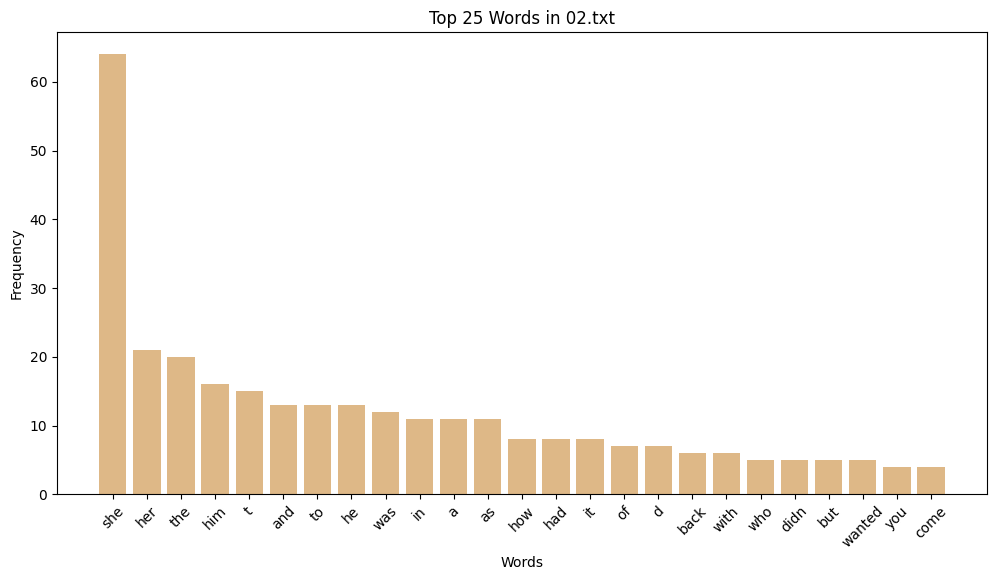

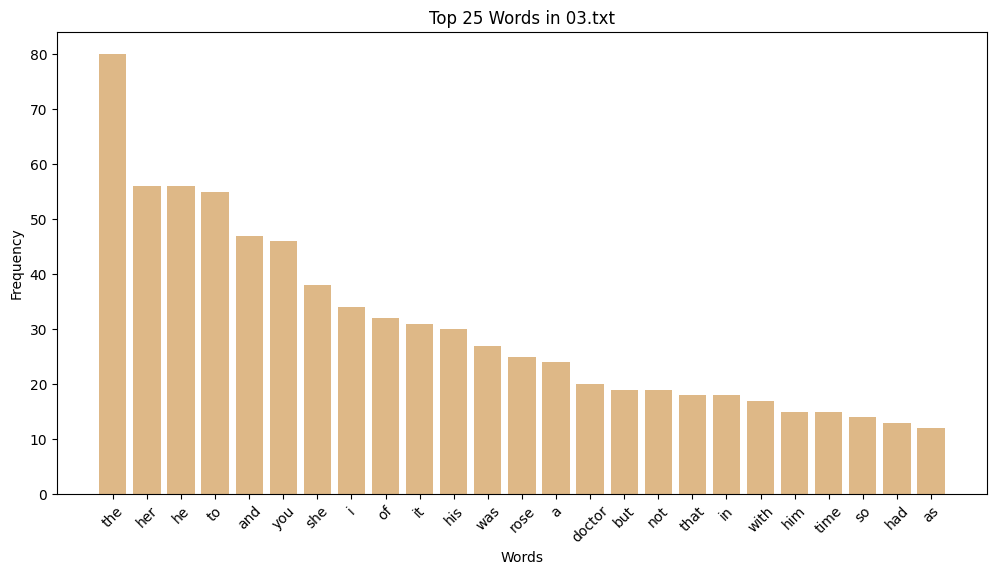

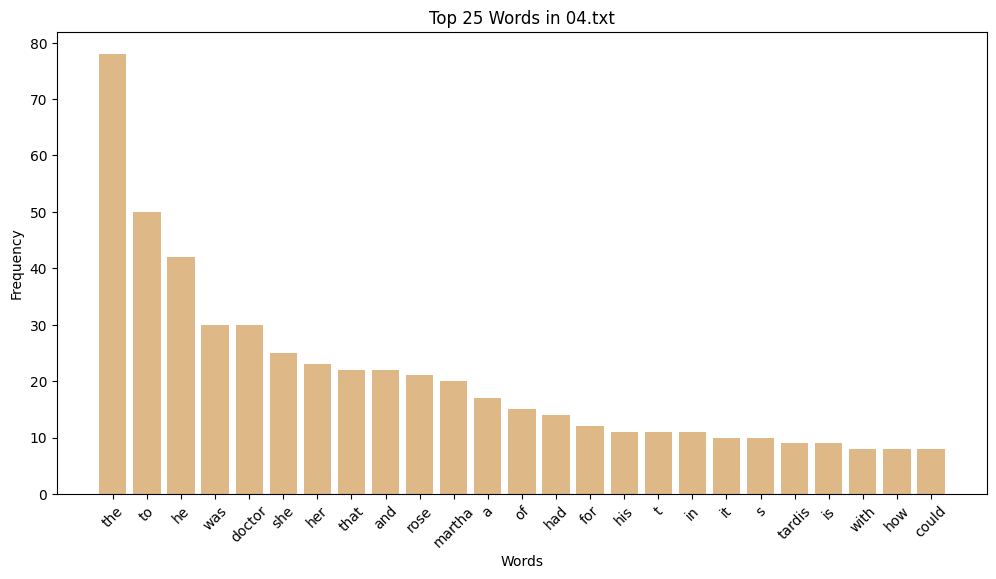

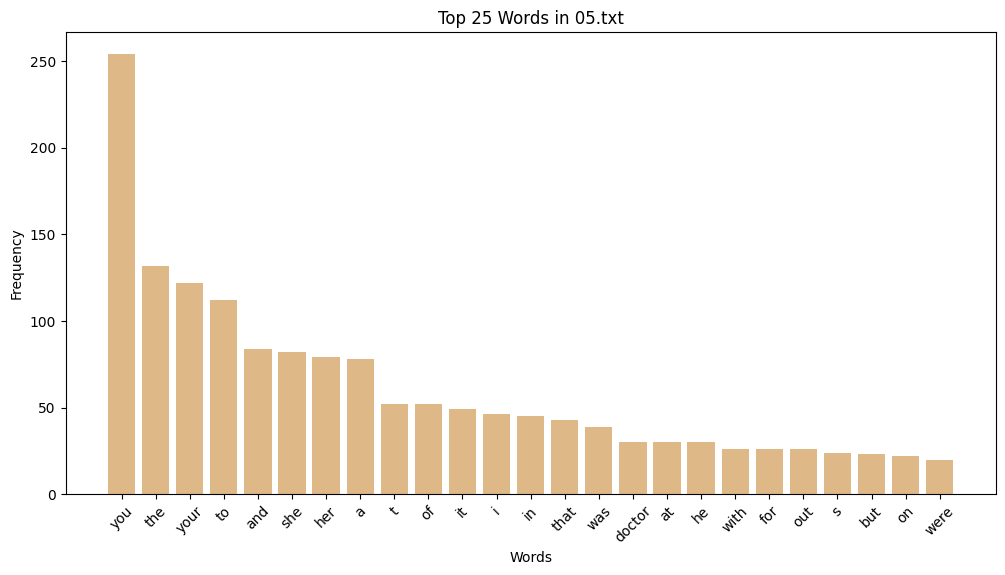

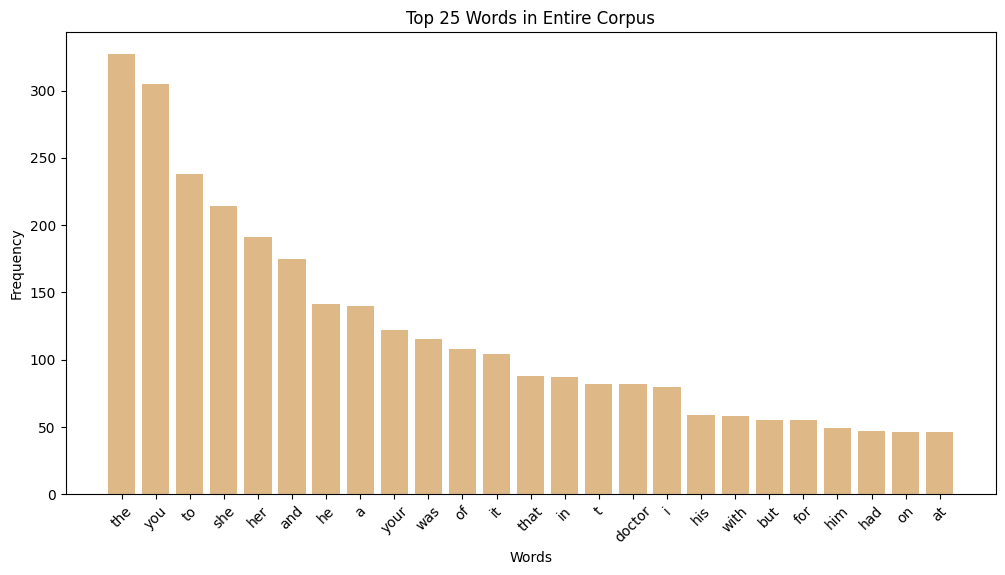

In [18]:
# Coming back to our word frequency exercise, make a function to plot results into a bar graph
def plot_word_frequencies(word_freq, title):
    most_common_words = word_freq.most_common(25)
    
    # Initialize two empty lists for words and counts to be displayed in the graph
    words = []
    counts = []
    
    # Iterate over the most common words and append to the lists
    for word, count in most_common_words:
        words.append(word) 
        counts.append(count)  

    # Set the labels and the other visualziation settings for the bar graph
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color='burlywood')
    plt.xticks(rotation=45)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

# Plot the graphs for the 25 most common words in each text
for filename, word_freq in word_freq_dict.items():
    plot_word_frequencies(word_freq, f"Top 25 Words in {filename}")

# Plot total corpus word frequency 
plot_word_frequencies(total_word_freq, "Top 25 Words in Entire Corpus")

### 1.2 Stemming with NLTK's PorterStemmer and LancasterStemmer

In [19]:
from nltk.stem import PorterStemmer, LancasterStemmer

# Function to tokenize and stem words using the Lancaster Stemmer
def tokenize_and_stem_L(text, stemmer):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Apply the Porter Stemmer to each word
    stemmed_words = [stemmer.stem(word.lower()) for word in words if word.isalpha()]  # Ignore punctuation
    
    return stemmed_words

# Function to preprocess and count word frequencies in the text
def count_word_frequencies(filenames):
    
    word_freq_dict = {}  # Dictionary to store word frequencies for each file
    stemmer = LancasterStemmer()  # Initialize the Lancaster Stemmer
    
    for filename in filenames:
        text = read_file(filename)  # Read the raw text
        stemmed_words = tokenize_and_stem_L(text, stemmer)  # Tokenize and stem the words
        word_freq_dict[os.path.basename(filename)] = Counter(stemmed_words)  # Count frequencies and store in the dictionary
    
    return word_freq_dict

In [20]:
# Count word frequencies after Lancaster stemming
word_freq_dict = count_word_frequencies(filenames)

# Compute total word frequency across all files
total_word_freq = Counter()
for word_freq in word_freq_dict.values():
    total_word_freq.update(word_freq)

In [21]:
word_freq_dict

{'01.txt': Counter({'the': 17,
          'her': 12,
          'riv': 11,
          'missy': 10,
          'a': 10,
          'and': 9,
          'to': 8,
          'was': 7,
          'on': 7,
          'map': 7,
          'it': 6,
          'smil': 6,
          'she': 5,
          'look': 5,
          'at': 5,
          'plac': 5,
          'that': 4,
          'ov': 4,
          's': 4,
          'sit': 3,
          'chair': 3,
          'had': 3,
          'cup': 3,
          'in': 2,
          'hous': 2,
          'norm': 2,
          'out': 2,
          'of': 2,
          'peopl': 2,
          'own': 2,
          'thi': 2,
          'stil': 2,
          'point': 2,
          'lean': 2,
          'kiss': 2,
          'tabl': 2,
          'coff': 2,
          'bit': 2,
          'or': 2,
          'littl': 2,
          'turn': 2,
          'pap': 1,
          'spread': 1,
          'around': 1,
          'plan': 1,
          'ment': 1,
          'but': 1,
          'suggest': 1,
   

In [22]:
total_word_freq

Counter({'the': 327,
         'you': 305,
         'to': 238,
         'she': 214,
         'her': 197,
         'and': 175,
         'he': 141,
         'a': 140,
         'yo': 124,
         'was': 115,
         'of': 108,
         'it': 106,
         'that': 88,
         'in': 87,
         't': 82,
         'doct': 82,
         'i': 80,
         'on': 77,
         'his': 59,
         'with': 58,
         'but': 55,
         'for': 55,
         'him': 49,
         'had': 47,
         'at': 47,
         'ros': 46,
         'not': 45,
         'as': 42,
         'so': 41,
         's': 40,
         'tim': 36,
         'out': 35,
         'wer': 35,
         'be': 34,
         'when': 31,
         'hav': 29,
         'could': 29,
         'up': 29,
         'smil': 28,
         'back': 28,
         'how': 28,
         'thi': 27,
         'what': 27,
         'ey': 27,
         'from': 26,
         'lik': 26,
         'hand': 25,
         'didn': 25,
         'look': 24,
         'an': 2

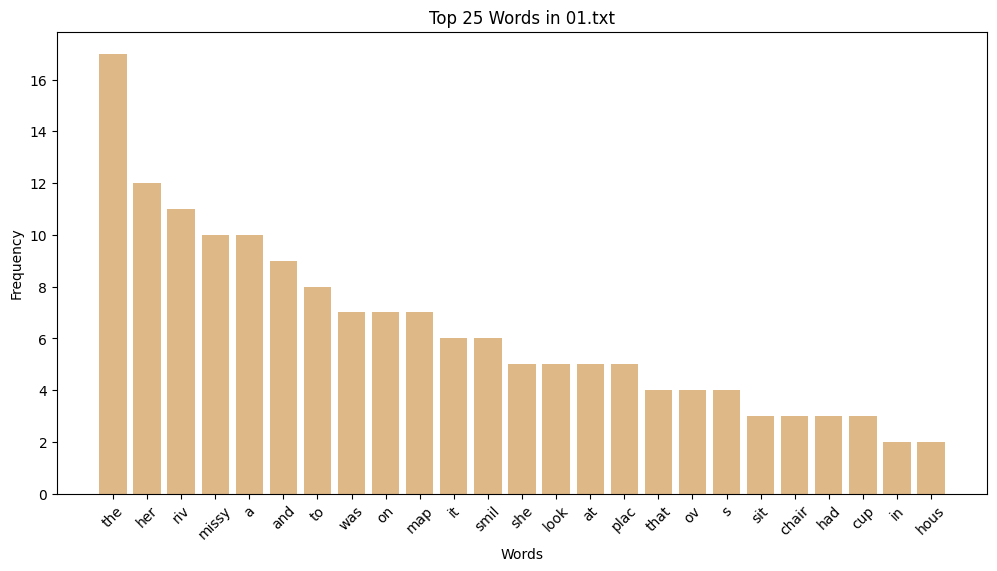

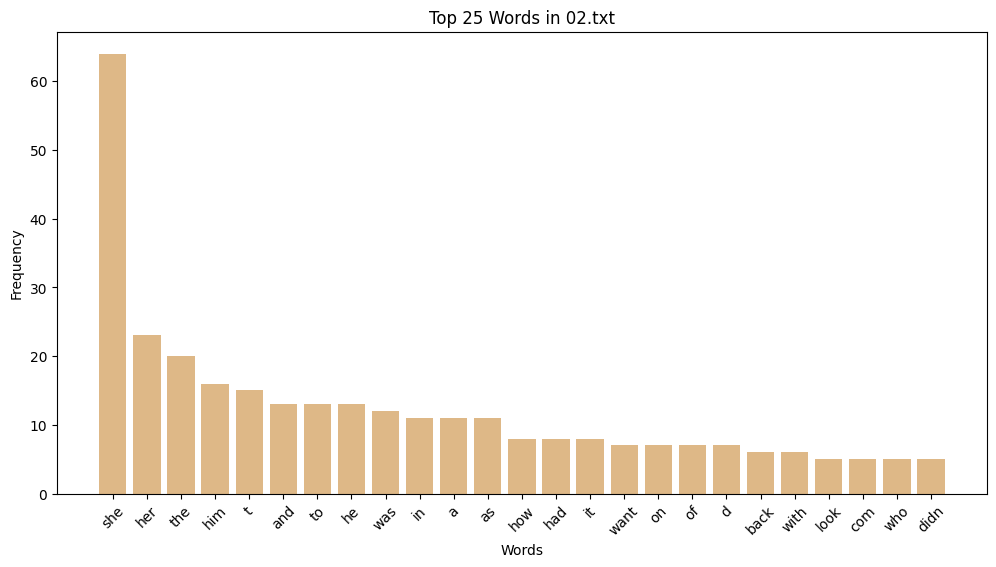

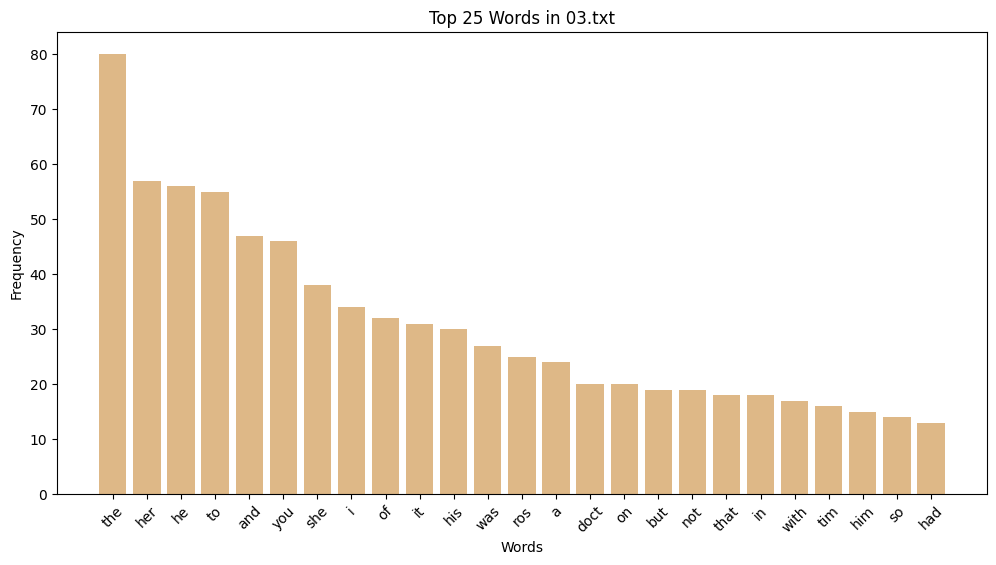

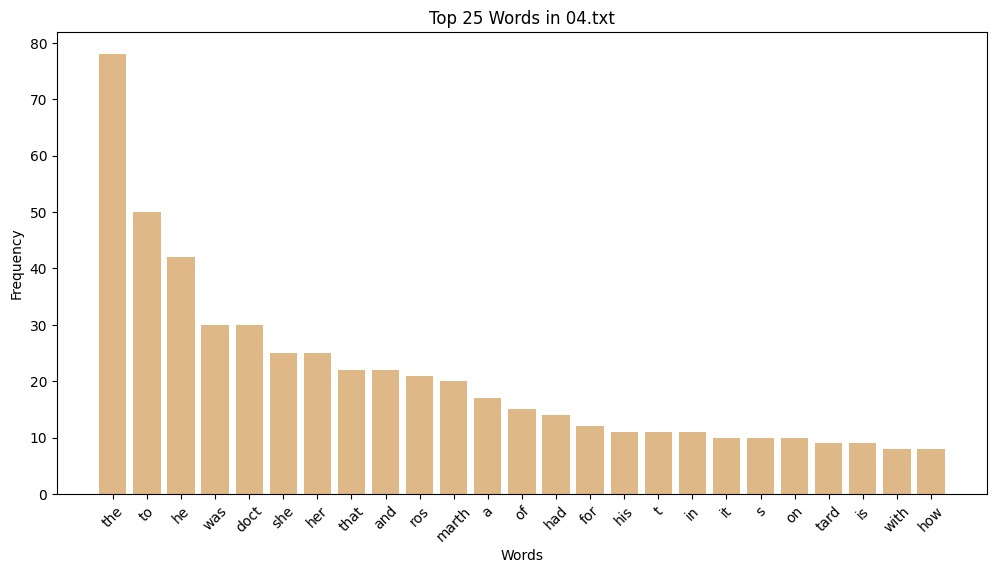

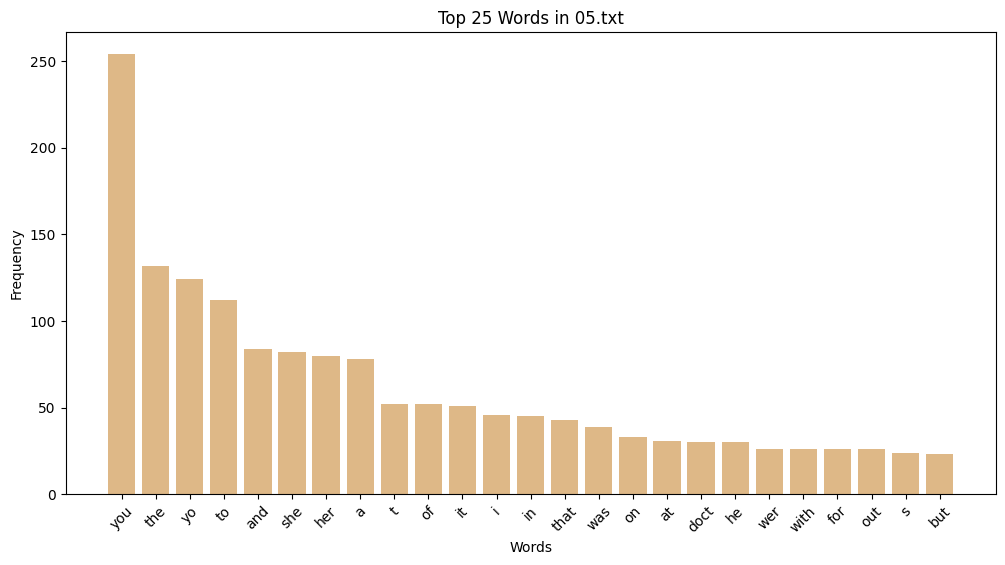

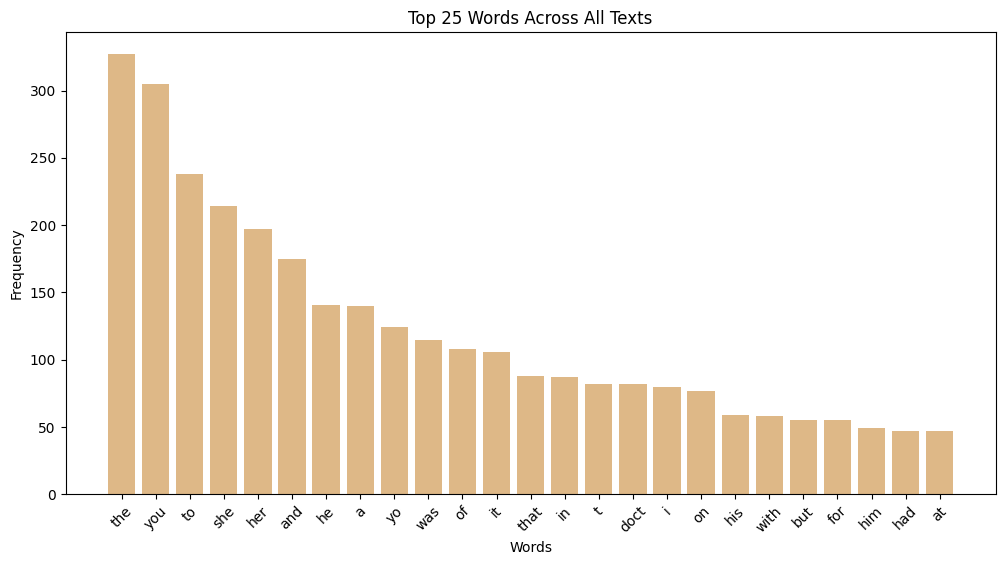

In [23]:
# Plot bar graph for per-story word frequencies (top 25 words in each text)
for filename, word_freq in word_freq_dict.items():
    plot_word_frequencies(word_freq, f"Top 25 Words in {filename}")

# Plot bar graph for total word frequencies (top 25 most common words across all texts)
plot_word_frequencies(total_word_freq, "Top 25 Words Across All Texts")

In [24]:
from nltk.stem import PorterStemmer, LancasterStemmer

# Function to tokenize and stem words using the Porter Stemmer
def tokenize_and_stem_P(text, stemmer):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Apply the Porter Stemmer to each word
    stemmed_words = [stemmer.stem(word.lower()) for word in words if word.isalpha()]  # Ignore punctuation
    
    return stemmed_words

# Function to preprocess and count word frequencies in the text
def count_word_frequencies(filenames):
    word_freq_dict = {}  # Dictionary to store word frequencies for each file
    stemmer = PorterStemmer()  # Initialize the Porter Stemmer
    
    for filename in filenames:
        text = read_file(filename)  # Read the raw text
        stemmed_words = tokenize_and_stem_P(text, stemmer)  # Tokenize and stem the words
        word_freq_dict[os.path.basename(filename)] = Counter(stemmed_words)  # Count frequencies and store in the dictionary
    
    return word_freq_dict

In [25]:
# Count word frequencies after Porter stemming
word_freq_dict = count_word_frequencies(filenames)

# Compute total word frequency across all files
total_word_freq = Counter()
for word_freq in word_freq_dict.values():
    total_word_freq.update(word_freq)

In [26]:
total_word_freq

Counter({'the': 327,
         'you': 305,
         'to': 238,
         'she': 214,
         'her': 194,
         'and': 175,
         'he': 141,
         'a': 140,
         'your': 124,
         'wa': 115,
         'of': 108,
         'it': 106,
         'that': 88,
         'in': 87,
         't': 82,
         'doctor': 82,
         'i': 80,
         'hi': 59,
         'with': 58,
         'but': 55,
         'for': 55,
         'him': 49,
         'had': 47,
         'on': 46,
         'at': 46,
         'rose': 46,
         'as': 42,
         'so': 41,
         's': 40,
         'be': 39,
         'not': 39,
         'time': 36,
         'out': 35,
         'when': 31,
         'have': 29,
         'could': 29,
         'up': 29,
         'smile': 28,
         'back': 28,
         'were': 28,
         'how': 28,
         'thi': 27,
         'what': 27,
         'eye': 27,
         'do': 26,
         'from': 26,
         'like': 26,
         'hand': 25,
         'didn': 25,
         

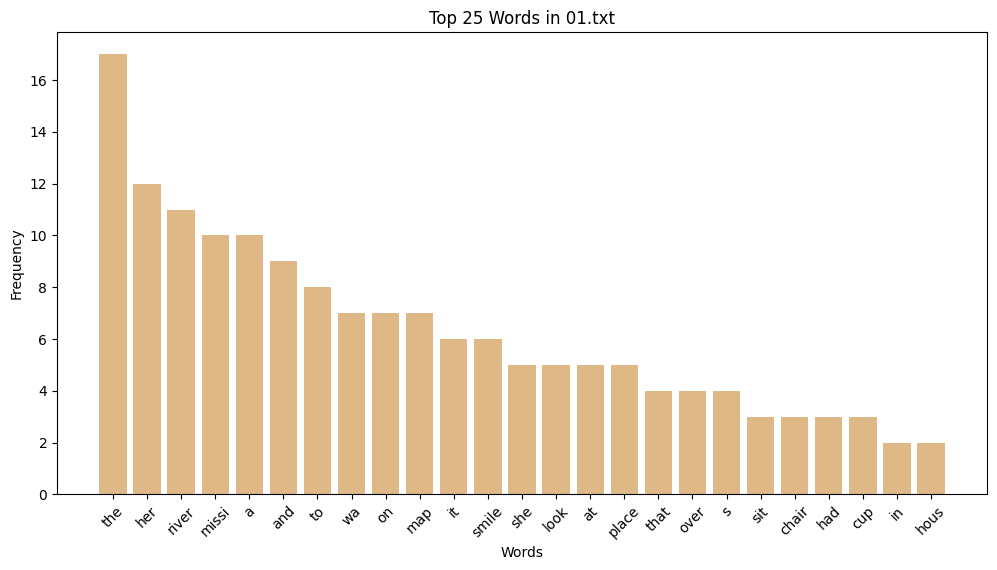

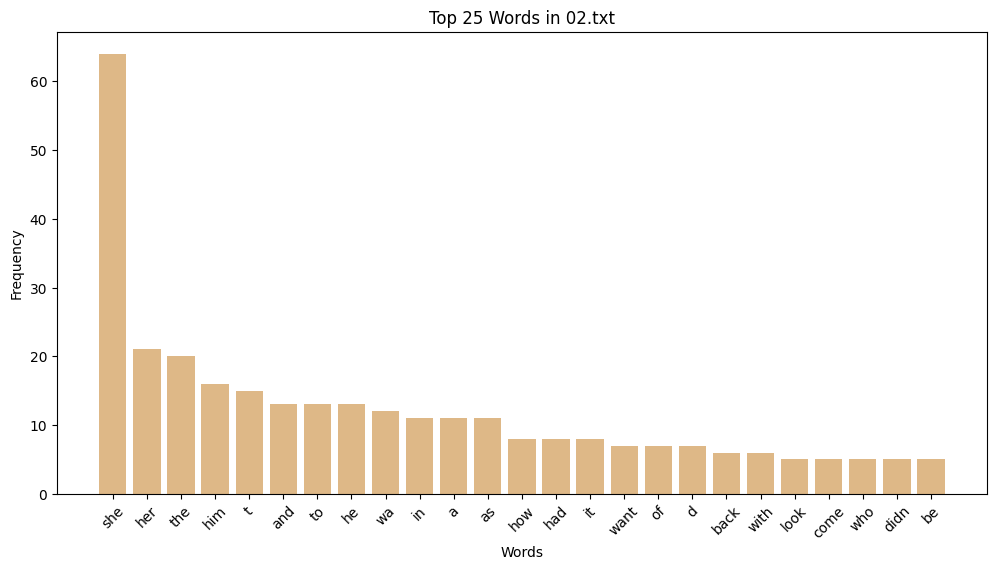

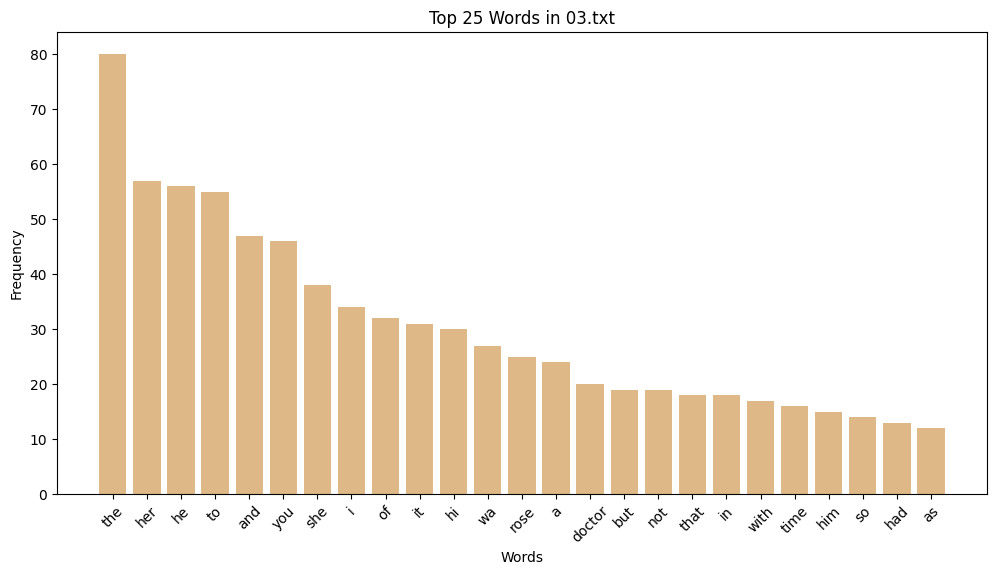

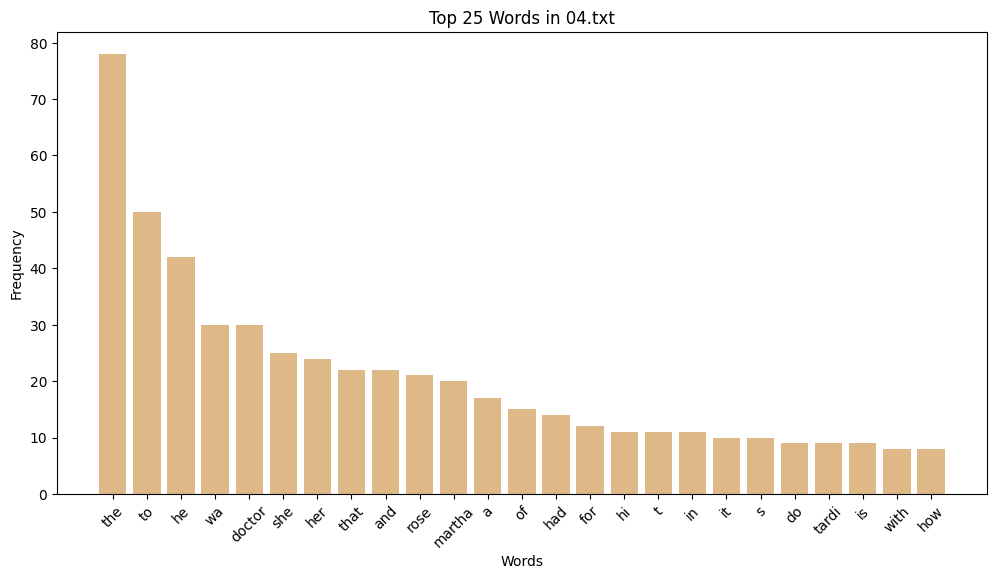

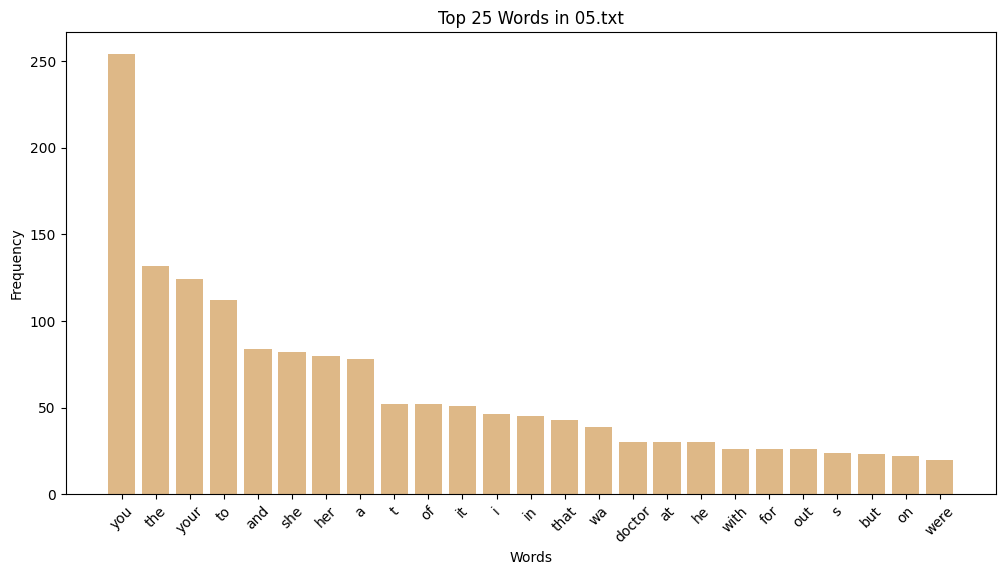

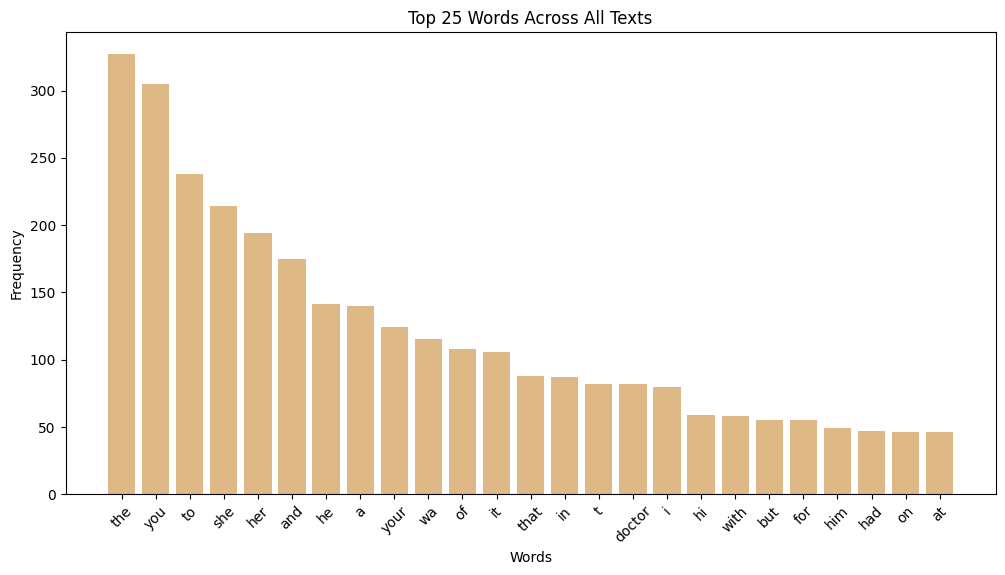

In [27]:
# Plot bar graph for per-story word frequencies (top 25 words in each text)
for filename, word_freq in word_freq_dict.items():
    plot_word_frequencies(word_freq, f"Top 25 Words in {filename}")

# Plot bar graph for total word frequencies (top 25 most common words across all texts)
plot_word_frequencies(total_word_freq, "Top 25 Words Across All Texts")

### Part 1.3 Detecting Parts of Speech (POS) tags and their Frequency with SpaCy

In [28]:
# Assign the correct folder that contains the texts for this part of the assignment
filenames = glob('Part_I_3/*.txt')

In [29]:
filenames

['Part_I_3\\pg18381.txt', 'Part_I_3\\pg30165.txt', 'Part_I_3\\pg74.txt']

In [30]:
texts =[]
for file in filenames:
    if file.endswith('.txt'):
        text = (open(file, 'r', encoding='utf-8').read())
        texts.append(text)

Upon inspecting the documents we notice that the books are formatted differently. Some, like the English version has a table of contents (ToC), while the Dutch and German ones do not. We will use the regular expressions (re) package to set some rules for each text that will only collect the content text for the analysis and remove any unnecessary information such as Project Gutenberg info (which will be kept in the Raw_Text column of the DataFrame), ToC and others.

In [31]:
def extract_english_chapters(text):
    
    # Remove everything before "THE AUTHOR. HARTFORD, 1876." 
    
    start_index = text.find("THE AUTHOR.\n\nHARTFORD, 1876.")  # Find where the actual text starts
    
    if start_index == -1:
        raise ValueError("Could not find the start marker 'THE AUTHOR. HARTFORD, 1876.'")
    
    # Find the first chapter after this start marker
    first_chapter_index = text.find("CHAPTER I", start_index)  # Can also adapt if the first chapter name varies
    
    # Get the text starting from the first chapter
    text = text[first_chapter_index:]

    # Remove everything after the Project Gutenberg footer
    
    end_marker = "*** END OF THE PROJECT GUTENBERG EBOOK"
    end_index = text.find(end_marker)
    
    if end_index != -1:
        text = text[:end_index].strip()

    return text


# Make a similar function to clean the Dutch translation

def extract_dutch_chapters(text):
    
    # Find the first chapter in Dutch
    pattern = r'(?s)HOOFDSTUK\s+[IVXLCDM\d]+'
    first_chapter_index = re.search(pattern, text)

    if first_chapter_index:
        text = text[first_chapter_index.start():]

    # Remove everything after "DE SCHRIJVER" (which marks the end of the novel in the Dutch translation)
    end_marker = "DE SCHRIJVER"
    end_index = text.find(end_marker)
    
    if end_index != -1:
        text = text[:end_index].strip()

    return text
 

# Make a similar function to clean the German translation

def extract_german_chapters(text):
    # Find the first German chapter: "Erstes Kapitel"
    first_chapter_index = text.find("Erstes Kapitel")
    
    text = text[first_chapter_index:]

    # Remove everything after the Project Gutenberg footer
    end_marker = "*** END OF THE PROJECT GUTENBERG"
    end_index = text.find(end_marker)
    
    if end_index != -1:
        text = text[:end_index].strip()

    return text

In [32]:
texts[1]

'\ufeffThe Project Gutenberg eBook of Die Abenteuer Tom Sawyers\n    \nThis ebook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this ebook or online\nat www.gutenberg.org. If you are not located in the United States,\nyou will have to check the laws of the country where you are located\nbefore using this eBook.\n\nTitle: Die Abenteuer Tom Sawyers\n\n\nAuthor: Mark Twain\n\nTranslator: H. Hellwag\n\nRelease date: October 3, 2009 [eBook #30165]\n\nLanguage: German\n\n\n\n*** START OF THE PROJECT GUTENBERG EBOOK DIE ABENTEUER TOM SAWYERS ***\n\n\n\nProduced by Jens Sadowski\n\n\n\n\nTranscriber\'s Note: This book was transcribed from the edition by\nVerlag von Otto Hendel, Halle a. d. Saale, 1900.\nText that was s p a c e d - o u t in the original has been changed to use _italics_.\nDo

In [33]:
# Display the results
extracted_dutch_text = extract_dutch_chapters(texts[0]) 
extracted_german_text = extract_german_chapters(texts[1])  
extracted_english_text = extract_english_chapters(texts[2])

In [34]:
extracted_dutch_text

'HOOFDSTUK I.\n\n\n"Tom!"\n\nGeen antwoord.\n\n"Tom!"\n\nGeen antwoord.\n\n"Waar zou die drommelsche jongen toch zitten? Hoor je me niet, Tom?"\n\nDe oude dame, die deze woorden sprak, trok haar bril naar beneden\nom er overheen te kijken. Daarna duwde zij hem naar boven om er\nonderdoor te kijken. Zelden of nooit gebruikte zij hem om er _door_\nte kijken, althans niet naar een zoo onbeduidend voorwerp als een\nkleine jongen. Immers haar bril was haar roem, de trots van haar hart,\nen zij had hem gekocht om ontzag in te boezemen,--niet om dienst te\ndoen. Voor hare oogen toch kon zij evengoed een deksel van een sauspan\ngenomen hebben. Een oogenblik zag zij onthutst in het rond en zeide,\nniet bepaald barsch, maar luid genoeg om door al de meubelen in de\nkamer gehoord te worden:\n\n"Als ik je krijg, dan zal...."\n\nMeer kon zij niet uitbrengen, want al pratende had zij zich\nvoorovergebukt om met een bezem onder het bed te voelen of zich daar\nook iemand verscholen had; en zij hijgde 

In [35]:
extracted_german_text

'Erstes Kapitel.\n\n,,Tom!"\n\nKeine Antwort.\n\n,,Tom!"\n\nAlles still.\n\n,,Soll mich doch wundern, wo der Bengel wieder steckt! Tom!"\n\nDie alte Dame schob ihre Brille hinunter und schaute darüber hinweg; dann\nschob sie sie auf die Stirn und schaute darunter weg. Selten oder nie\nschaute sie nach einem so kleinen Ding, wie ein Knabe ist, _durch_ die\nGläser dieser ihrer Staatsbrille, die der Stolz ihres Herzens war und mehr\nstilvoll als brauchbar; sie würde durch ein paar Herdringe ebensoviel\ngesehen haben. Unruhig hielt sie einen Augenblick Umschau und sagte, nicht\ngerade erzürnt, aber doch immer laut genug, um im ganzen Zimmer gehört zu\nwerden: ,,Ich werde strenges Gericht halten müssen, wenn ich dich erwische,\nich werde --"\n\nHier brach sie ab, denn sie hatte sich inzwischen niedergebeugt und\nstocherte mit dem Besen unter dem Bett herum, und dann mußte sie wieder\nAtem holen, um ihrem Ärger Ausdruck zu verleihen. Sie hatte nichts als die\nKatze aufgestöbert.\n\n,,So ein 

In [36]:
extracted_english_text

'CHAPTER I\n\n\n“Tom!”\n\nNo answer.\n\n“TOM!”\n\nNo answer.\n\n“What’s gone with that boy, I wonder? You TOM!”\n\nNo answer.\n\nThe old lady pulled her spectacles down and looked over them about the\nroom; then she put them up and looked out under them. She seldom or\nnever looked _through_ them for so small a thing as a boy; they were\nher state pair, the pride of her heart, and were built for “style,” not\nservice—she could have seen through a pair of stove-lids just as well.\nShe looked perplexed for a moment, and then said, not fiercely, but\nstill loud enough for the furniture to hear:\n\n“Well, I lay if I get hold of you I’ll—”\n\nShe did not finish, for by this time she was bending down and punching\nunder the bed with the broom, and so she needed breath to punctuate the\npunches with. She resurrected nothing but the cat.\n\n“I never did see the beat of that boy!”\n\nShe went to the open door and stood in it and looked out among the\ntomato vines and “jimpson” weeds that consti

In [37]:
# Add the texts to a list that will subsequently be used within a DataFrame object
extracted_texts = []
extracted_texts.append(extracted_dutch_text)
extracted_texts.append(extracted_german_text)
extracted_texts.append(extracted_english_text)

In [38]:
# Create dictionary object associating each file name with its text and with its cleaned version
d = {'Filename':filenames, 'Raw_Text':texts, 'Cleaned_Text': extracted_texts}

In [39]:
# Turn dictionary into a dataframe
sawyer_df = pd.DataFrame(d)

In [40]:
# Display the result
sawyer_df.head()

,Filename,Raw_Text,Cleaned_Text
0,Part_I_3\pg18381.txt,﻿The Project Gutenberg eBook of De Lotgevallen...,"HOOFDSTUK I.\n\n\n""Tom!""\n\nGeen antwoord.\n\n..."
1,Part_I_3\pg30165.txt,﻿The Project Gutenberg eBook of Die Abenteuer ...,"Erstes Kapitel.\n\n,,Tom!""\n\nKeine Antwort.\n..."
2,Part_I_3\pg74.txt,﻿The Project Gutenberg eBook of The Adventures...,CHAPTER I\n\n\n“Tom!”\n\nNo answer.\n\n“TOM!”\...


In [41]:
# Apply the clean_text function from before to the Dataframe column containing our texts
sawyer_df['Cleaned_Text'] = sawyer_df['Cleaned_Text'].apply(clean_text)

In [42]:
sawyer_df.head()

,Filename,Raw_Text,Cleaned_Text
0,Part_I_3\pg18381.txt,﻿The Project Gutenberg eBook of De Lotgevallen...,"HOOFDSTUK I. ""Tom!"" Geen antwoord. ""Tom!"" Geen..."
1,Part_I_3\pg30165.txt,﻿The Project Gutenberg eBook of Die Abenteuer ...,"Erstes Kapitel. ,,Tom!"" Keine Antwort. ,,Tom!""..."
2,Part_I_3\pg74.txt,﻿The Project Gutenberg eBook of The Adventures...,CHAPTER I “Tom!” No answer. “TOM!” No answer. ...


In [43]:
# Print one of the texts to verify if the cleaning was successful
print(sawyer_df['Cleaned_Text'].iloc[2])

CHAPTER I “Tom!” No answer. “TOM!” No answer. “What’s gone with that boy, I wonder? You TOM!” No answer. The old lady pulled her spectacles down and looked over them about the room; then she put them up and looked out under them. She seldom or never looked _through_ them for so small a thing as a boy; they were her state pair, the pride of her heart, and were built for “style,” not service—she could have seen through a pair of stove-lids just as well. She looked perplexed for a moment, and then said, not fiercely, but still loud enough for the furniture to hear: “Well, I lay if I get hold of you I’ll—” She did not finish, for by this time she was bending down and punching under the bed with the broom, and so she needed breath to punctuate the punches with. She resurrected nothing but the cat. “I never did see the beat of that boy!” She went to the open door and stood in it and looked out among the tomato vines and “jimpson” weeds that constituted the garden. No Tom. So she lifted up he

In [44]:
# To remove confusion, rename the files in the DataFrame to their corresponding translation/version
version_names = {
    "Part_I_3\\pg18381.txt": "Tom_Sawyer_Dutch.txt",
    "Part_I_3\\pg30165.txt": "Tom_Sawyer_German.txt",
    "Part_I_3\\pg74.txt": "Tom_Sawyer_English.txt"
}

sawyer_df["Filename"] = sawyer_df["Filename"].replace(version_names)
sawyer_df.head()

,Filename,Raw_Text,Cleaned_Text
0,Tom_Sawyer_Dutch.txt,﻿The Project Gutenberg eBook of De Lotgevallen...,"HOOFDSTUK I. ""Tom!"" Geen antwoord. ""Tom!"" Geen..."
1,Tom_Sawyer_German.txt,﻿The Project Gutenberg eBook of Die Abenteuer ...,"Erstes Kapitel. ,,Tom!"" Keine Antwort. ,,Tom!""..."
2,Tom_Sawyer_English.txt,﻿The Project Gutenberg eBook of The Adventures...,CHAPTER I “Tom!” No answer. “TOM!” No answer. ...


In [45]:
# Install and load the spaCy German and Dutch language models; the largest language model will be loaded for most accurate results. 

!spacy download de_core_news_lg
!spacy download nl_core_news_lg

nlp_de = spacy.load('de_core_news_lg')
nlp_nl = spacy.load('nl_core_news_lg')

Since we are dealing with texts in three different languages, we need to make sure that each texts is getting processed through its corresponding spaCY language pipeline. For that we need to define a conditional function.

In [46]:
# Define a function that will recognize which language pipeline to use if the file containts a language keyword in the title
def language_pipeline(row):
    text = row["Cleaned_Text"]
    filename = row["Filename"].lower()

    if "english" in filename:
        nlp = nlp_en
    elif "dutch" in filename:
        nlp = nlp_nl
    elif "german" in filename:
        nlp = nlp_de

    return nlp(text)  # Processed text

In [47]:
# Apply the function to the Cleaned_Text column 
sawyer_df["Doc"] = sawyer_df.apply(language_pipeline, axis = 1)

In [48]:
sawyer_df.head()

,Filename,Raw_Text,Cleaned_Text,Doc
0,Tom_Sawyer_Dutch.txt,﻿The Project Gutenberg eBook of De Lotgevallen...,"HOOFDSTUK I. ""Tom!"" Geen antwoord. ""Tom!"" Geen...","(HOOFDSTUK, I., "", Tom, !, "", Geen, antwoord, ..."
1,Tom_Sawyer_German.txt,﻿The Project Gutenberg eBook of Die Abenteuer ...,"Erstes Kapitel. ,,Tom!"" Keine Antwort. ,,Tom!""...","(Erstes, Kapitel, ., ,, ,, Tom, !, "", Keine, A..."
2,Tom_Sawyer_English.txt,﻿The Project Gutenberg eBook of The Adventures...,CHAPTER I “Tom!” No answer. “TOM!” No answer. ...,"(CHAPTER, I, “, Tom, !, ”, No, answer, ., “, T..."


In [49]:
# Define a function to retrieve part of speech tags (both coarse and fine) from a Doc object
def get_pos_tags(doc):
    return [(token.pos_, token.tag_) for token in doc]

sawyer_df["POS_Tags"] = sawyer_df["Doc"].apply(get_pos_tags)

In [50]:
sawyer_df.head()

,Filename,Raw_Text,Cleaned_Text,Doc,POS_Tags
0,Tom_Sawyer_Dutch.txt,﻿The Project Gutenberg eBook of De Lotgevallen...,"HOOFDSTUK I. ""Tom!"" Geen antwoord. ""Tom!"" Geen...","(HOOFDSTUK, I., "", Tom, !, "", Geen, antwoord, ...","[(PROPN, SPEC|deeleigen), (NOUN, SPEC|symb), (..."
1,Tom_Sawyer_German.txt,﻿The Project Gutenberg eBook of Die Abenteuer ...,"Erstes Kapitel. ,,Tom!"" Keine Antwort. ,,Tom!""...","(Erstes, Kapitel, ., ,, ,, Tom, !, "", Keine, A...","[(ADJ, ADJA), (NOUN, NN), (PUNCT, $.), (PUNCT,..."
2,Tom_Sawyer_English.txt,﻿The Project Gutenberg eBook of The Adventures...,CHAPTER I “Tom!” No answer. “TOM!” No answer. ...,"(CHAPTER, I, “, Tom, !, ”, No, answer, ., “, T...","[(NOUN, NN), (PRON, PRP), (PUNCT, ``), (PROPN,..."


In [51]:
# Define a function to calculate the POS tag frequencies and use the 'Counter method' again to count the frequency of each POS tag
def calculate_pos_frequencies(doc):
    # Extract the POS tags from the Doc object
    pos_tags = [token.pos_ for token in doc]  
    
    # Count the frequency of each POS tag using Counter
    pos_freq = Counter(pos_tags)
    
    return pos_freq

In [52]:
# Apply the function to calculate POS tag frequencies for each processed Doc
sawyer_df["POS_Frequencies"] = sawyer_df["Doc"].apply(calculate_pos_frequencies)

In [53]:
# Loop through the POS_Frequencies column and print the full list for each row
for index, row in sawyer_df.iterrows():
    print(f"Filename: {row['Filename']}")
    print(f"POS Frequencies: {row['POS_Frequencies']}")
    print("\n")

Filename: Tom_Sawyer_Dutch.txt
POS Frequencies: Counter({'PUNCT': 13910, 'VERB': 11621, 'NOUN': 11558, 'PRON': 10125, 'ADP': 8805, 'DET': 7298, 'ADV': 6037, 'ADJ': 4938, 'AUX': 4000, 'CCONJ': 3497, 'PROPN': 3217, 'SCONJ': 2047, 'NUM': 399, 'INTJ': 361, 'SYM': 354, 'SPACE': 48, 'X': 22})


Filename: Tom_Sawyer_German.txt
POS Frequencies: Counter({'PUNCT': 18134, 'NOUN': 10624, 'VERB': 9328, 'ADV': 9112, 'PRON': 8807, 'DET': 7484, 'ADP': 5218, 'AUX': 3952, 'CCONJ': 3371, 'ADJ': 3184, 'PROPN': 2446, 'PART': 1703, 'SCONJ': 1550, 'X': 417, 'NUM': 289, 'INTJ': 221, 'SPACE': 81})


Filename: Tom_Sawyer_English.txt
POS Frequencies: Counter({'PUNCT': 15390, 'NOUN': 11852, 'VERB': 11467, 'PRON': 10238, 'ADP': 7210, 'DET': 6850, 'ADV': 4940, 'ADJ': 4432, 'AUX': 4337, 'CCONJ': 3838, 'PROPN': 2943, 'PART': 2346, 'SCONJ': 1813, 'NUM': 508, 'INTJ': 496, 'X': 60, 'SPACE': 34})




## Part 2. Named-Entity Recognition with SpaCy

### 2.1 Performing Automatic NER

In [54]:
# Load spaCy visualizer
from spacy import displacy

In [55]:
# Define function to extract named entities from doc objects
def extract_named_entities(doc):
    return [ent.label_ for ent in doc.ents]
# Apply function to Doc column and store resulting named entities in a new column
part1_df['Named_Entities'] = part1_df['Doc'].apply(extract_named_entities)
part1_df['Named_Entities']

# Apply function to Doc column and store resulting named entities foudn in the corpus in a new column
part1_df['NE_Words'] = part1_df['Doc'].apply(extract_named_entities)
part1_df['NE_Words']

0    [PERSON, PERSON, PERSON, LOC, PERSON, LOC, PER...
1    [DATE, DATE, DATE, DATE, GPE, CARDINAL, ORDINA...
2    [PERSON, PERSON, CARDINAL, PERSON, CARDINAL, C...
3    [PERSON, EVENT, PERSON, PERSON, PERSON, ORG, P...
4    [CARDINAL, ORDINAL, CARDINAL, CARDINAL, ORG, O...
Name: NE_Words, dtype: object

In [56]:
# Extract the first Doc object
doc = part1_df['Doc'][0]

In [57]:
# Visualize named entity tagging in the first text
displacy.render(doc, style='ent', jupyter=True)

It performs well, except for the fact that it confuses the name River with the river as a location.

In [58]:
for ent in doc.ents:
    print(f"{ent.text} - {ent.label_}")

Missy - PERSON
Missy - PERSON
Mary Poppins - PERSON
River - LOC
Missy - PERSON
River - LOC
Missy - PERSON
Missy - PERSON
Missy - PERSON
Missy - PERSON
an hour - TIME
Missy - PERSON
River - LOC
Missy - PERSON
Missy - PERSON


In [59]:
# Extract the last text
doc = part1_df['Doc'][4]

# Visualize named entity tagging in the first text
displacy.render(doc, style='ent', jupyter=True)

In [60]:
for ent in doc.ents:
    print(f"{ent.text} - {ent.label_}")

two - CARDINAL
first - ORDINAL
two - CARDINAL
two - CARDINAL
TARDIS - ORG
umpteenth - ORDINAL
the day - DATE
Universe - ORG
Y/n… - WORK_OF_ART
TARDIS - ORG
first - ORDINAL
first - ORDINAL
Days - DATE
weeks - DATE
third - ORDINAL
a few months - DATE
Torwash - PERSON
Torvash - PERSON
Serentara - GPE
two - CARDINAL
Torvash - PERSON
Torvash - PERSON
Torvash - WORK_OF_ART
Torvash - PERSON
Universe - ORG
Torvash - PERSON
TARDIS - ORG
Torvash - PERSON
Yaz - ORG
Dan - PERSON
Dan - PERSON
two - CARDINAL
Torvash - PERSON
two - CARDINAL
TARDIS - ORG
Torvash - PERSON
Yaz - PERSON
Heya - PERSON
Yaz - PERSON
Yaz - PERSON
TARDIS - ORG
Yaz - ORG
Dan - PERSON
Dan - PERSON
The Doctor - WORK_OF_ART
second - ORDINAL


A discussion on the accuracy of these results is presented in the written report.

### 2.2 Calculating Precision, Recall and F1 Score Between Automatic and Manual Annotations of Named Entities

In this section we will assign two sentences per text that contain named entities to their respective doc Object and use spaCy's NER pipeline alongside a mannually annotated version of the sentences. Then, we will compare the results by calculating the Precision, Recall and F1 Score of the automated annotations in comparison to the manual ones.

In [61]:
# First, print a list of the NER tags in spaCy
ner_labels = nlp_en.get_pipe("ner").labels
ner_labels

('CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART')

In [62]:
doc1 = nlp_en("""She was wearing a t-shirt that drenched her form, and some trousers that looked about the right size, 
                    Missy smiled, still in her Mary Poppins looking outfit, River looked over at the maps. 
                    It was an hour or two later and the maps had been pushed aside, 
                    Missy was sipping at the coffee, and River was, a little less elegantly now, sitting on the chair, 
                    she moved her hands forward, towards Missy, placing it on her hearts, feeling them beat, 
                    they were faster then normal, River smiled, Missy turned to look at her.""")

doc2 = nlp_en("""She wished it could have been him after he knew who she was, because what he was mostly talking about was 1969, 
                she wanted to know how her parents were in New York, 
                she wanted the more mature version of him, but she lent against him, sitting in the garden, 
                gently pulling him up to show him the three children she had been left with, it wasn’t night yet and they were playing together.""")

doc3 = nlp_en("""Rassilon, how he loved to say her name. "I was going to take you to so many places. 
                Barcelona. Not the city Barcelona, the planet Barcelona. It was then the Doctor understood- the small part of his brain not occupied 
                with kissing Rose calculated what the Bad Wolf had already known.""")

doc4 = nlp_en("""The Doctor only gave the TARDIS permission to translate certain things. He didn’t want some people to snoop around the library 
                and read on Gallifrey, so the TARDIS only had permission to translate that in emergencies. 
                The TARDIS struggled to translate some of The Doctor’s handwritten notes, she claimed that it was because his handwriting was awful.""")

doc5 = nlp_en("Yaz playfully rolled her eyes. She walked towards Dan, giving you and the Doctor a moment for yourselves.")

# Make a list of all the docs through which we will iterate later
docs = [doc1, doc2, doc3, doc4, doc5]

First we will make a dictionary of manually annotated entities for the texts above.

In [63]:
# Manual Annotations: (Text, Label)
manual_annotations = {
    "doc1": [("Missy", "PERSON"), ("Mary Poppins", "MISC"), ("River", "PERSON"), ("an hour", "TIME"), ("two", "CARDINAL"), ("Missy", "PERSON"), ("River", "PERSON"), ("Missy", "PERSON"), ("River", "PERSON"), ("Missy", "PERSON")],
    "doc2": [("1969", "DATE"), ("New York", "GPE"), ("three", "CARDINAL"), ("night", "TIME")],
    "doc3": [("Rassilon", "PERSON"), ("Barcelona", 'PLANET'), ('Barcelona', 'GPE'), ("Barcelona", 'PLANET'), ("Doctor", "PERSON"), ("Rose", "PERSON"), ("the Bad Wolf", "PERSON")],
    "doc4": [("Doctor", "PERSON"), ("TARDIS", "MISC"), ("Gallifrey", "PLANET"), ("TARDIS", "MISC"), ("TARDIS", "MISC"), ("Doctor", "PERSON")],
    "doc5": [("Yaz", "PERSON"), ("Dan", "PERSON"), ("Doctor", "PERSON"), ("a moment", "TIME")]
}

In [64]:
from spacy import displacy

# Function to display NER and export results
def display_ner(doc):
    # Display with displacy
    displacy.render(doc, style="ent", jupyter=True)

    # Return entities and their labels as a list of tuples
    return [(ent.text, ent.label_) for ent in doc.ents]

# List to store results for all documents
doc_entities_spaCy = {}

# Display NER for all documents and export the entities
for i, doc in enumerate(docs, 1):
    print(f"\n--- Document {i} ---")
    
    # Display NER and collect entities in a dictionary format
    doc_key = f"doc{i}"
    entities = display_ner(doc)
    
    # Store the document text and its entities in the dictionary
    doc_entities_spaCy[doc_key] = entities


# Print the exported dictionary
print("\nSpaCy Entities Dictionary:")
for doc_key, data in doc_entities_spaCy.items():
    print(f"\n{doc_key}:")
    print(data)


--- Document 1 ---



--- Document 2 ---



--- Document 3 ---



--- Document 4 ---



--- Document 5 ---



SpaCy Entities Dictionary:

doc1:
[('Missy', 'PERSON'), ('Mary Poppins', 'PERSON'), ('River', 'LOC'), ('an hour', 'TIME'), ('Missy', 'PERSON'), ('River', 'LOC'), ('Missy', 'PERSON'), ('Missy', 'PERSON')]

doc2:
[('1969', 'DATE'), ('New York', 'GPE'), ('three', 'CARDINAL')]

doc3:
[('Rassilon', 'PERSON'), ('Barcelona', 'GPE'), ('Barcelona', 'GPE'), ('Barcelona', 'GPE'), ('Rose', 'PERSON'), ('the Bad Wolf', 'ORG')]

doc4:
[('TARDIS', 'ORG'), ('Gallifrey', 'PERSON'), ('TARDIS', 'ORG'), ('TARDIS', 'ORG')]

doc5:
[('Yaz', 'PERSON'), ('Dan', 'PERSON')]


In [65]:
from collections import Counter

# Convert the dicts to lists of entity-label pairs
y_true = list(manual_annotations.values())
y_pred = list(doc_entities_spaCy.values())

# Flatten lists
y_true_flat = [ent for doc in y_true for ent in doc]
y_pred_flat = [ent for doc in y_pred for ent in doc]

# Separate text and labels for detailed comparison
y_true_ents = [ent for ent, label in y_true_flat]
y_pred_ents = [ent for ent, label in y_pred_flat]

y_true_pairs = Counter(y_true_flat)
y_pred_pairs = Counter(y_pred_flat)

# Track exact matches for analysis
TP_list = []
FP_list = []
FN_list = []

# Count True Positives: Exact match on both text and label
TP = sum((y_true_pairs & y_pred_pairs).values())
TP_list = list((y_true_pairs & y_pred_pairs).elements())

# Count False Positives and False Negatives
FP = 0
FN = 0

# Check for each predicted entity
for ent, label in y_pred_flat:
    if ent in y_true_ents:  # Entity is present in true labels
        if (ent, label) not in y_true_flat:
            # Entity is correct but label is wrong -> False Positive
            FP += 1
            FP_list.append((ent, label))

# Check for each true entity
for ent, label in y_true_flat:
    if ent not in y_pred_ents:
        # Entity is missing in prediction -> False Negative
        FN += 1
        FN_list.append((ent, label))

# Calculate Precision, Recall, and F1 Score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print the results
print(f"\nTrue Positives: {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


True Positives: 13
False Positives: 8
False Negatives: 7
Precision: 0.6190
Recall: 0.6500
F1 Score: 0.6341


In [66]:
# Detailed output of entities
print("\n--- Detailed Entity Analysis ---")
print("\nTrue Positives (Correctly recognized and labeled):")
for ent in TP_list:
    print(f"  - {ent}")

print("\nFalse Positives (Entity recognized but mislabeled):")
for ent in FP_list:
    print(f"  - {ent}")

print("\nFalse Negatives (Entity missed entirely):")
for ent in FN_list:
    print(f"  - {ent}")


--- Detailed Entity Analysis ---

True Positives (Correctly recognized and labeled):
  - ('Missy', 'PERSON')
  - ('Missy', 'PERSON')
  - ('Missy', 'PERSON')
  - ('Missy', 'PERSON')
  - ('an hour', 'TIME')
  - ('1969', 'DATE')
  - ('New York', 'GPE')
  - ('three', 'CARDINAL')
  - ('Rassilon', 'PERSON')
  - ('Barcelona', 'GPE')
  - ('Rose', 'PERSON')
  - ('Yaz', 'PERSON')
  - ('Dan', 'PERSON')

False Positives (Entity recognized but mislabeled):
  - ('Mary Poppins', 'PERSON')
  - ('River', 'LOC')
  - ('River', 'LOC')
  - ('the Bad Wolf', 'ORG')
  - ('TARDIS', 'ORG')
  - ('Gallifrey', 'PERSON')
  - ('TARDIS', 'ORG')
  - ('TARDIS', 'ORG')

False Negatives (Entity missed entirely):
  - ('two', 'CARDINAL')
  - ('night', 'TIME')
  - ('Doctor', 'PERSON')
  - ('Doctor', 'PERSON')
  - ('Doctor', 'PERSON')
  - ('Doctor', 'PERSON')
  - ('a moment', 'TIME')


For a reason that I could not determine, two instances of "Barcelona" that I labelled as "Planet" are not accounted for correctly in the code that I wrote. This means that the False Positives count should increase by two in order to calculate the correct Precission, Recall and F1 Scores that include the two instances of "Barcelona" labelled as "GPE" in the spaCy annotation. Likewise, the code misses one instance of "River" in the first text that was not identified by spaCy. This should increase the counts of the false negatives by 1. I increased the counts manually in order to get to the correct results.

In [67]:
FP = FP + 2
FN = FN + 1

In [68]:
# Calculate the Precision, Recall, and F1 Score with the updated FP counts
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print the results
print(f"\nTrue Positives: {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


True Positives: 13
False Positives: 10
False Negatives: 8
Precision: 0.5652
Recall: 0.6190
F1 Score: 0.5909


The results are commented in the submitted report.